# Avocado Prices Project

### Target Outcome

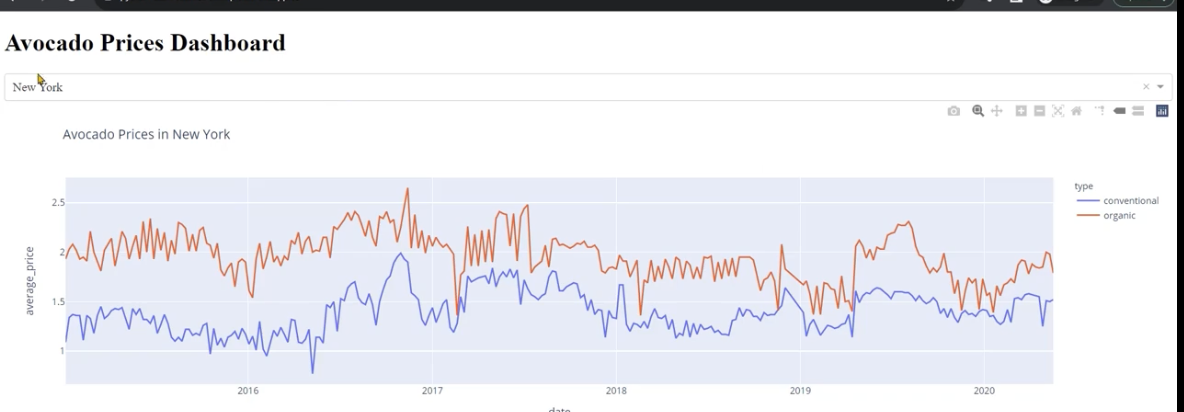

### Import packages

In [1]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

### Import data & EDA

In [2]:
data = pd.read_csv('avocado.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [3]:
data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### Build the app

In [11]:
app=Dash()

app.layout=html.Div([
    html.H1('Avocado Prices Dashboard'),
    dcc.Dropdown(id='geography-dropdown',
                 options=data['geography'].unique(),
                 value=data['geography'][0]),
    dcc.Graph('avocado-prices')
])

@app.callback(
    Output('avocado-prices', 'figure'),
    Input('geography-dropdown', 'value')
)

def update_graph(selected_geography):
    filtered_prices=data[data['geography']==selected_geography]
    line_fig=px.line(filtered_prices,
                     x='date',
                     y='average_price',
                     color='type',
                     title=f'Avocado Prices in {selected_geography}')
    return line_fig

if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode='external')

Dash app running on http://127.0.0.1:8050/
